In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Import data: the nodes information of all streamers

In [2]:
df = pd.read_csv("data/tags.csv",lineterminator='\n')
print(df.shape)


(187, 13)


In [3]:
df = df[(df['value']>2000)]
df.shape

(187, 13)

In [4]:
df1 = pd.read_csv("data/CPM.csv", lineterminator='\n')
df2 = pd.read_csv("data/louvian.csv", lineterminator='\n')
df3 = pd.read_csv("data/newmanG.csv", lineterminator='\n')

## Generate figures that used in the report

In [5]:
def drawplot(df, attr, ptype, title='', xlabel='', ylabel=''):
    '''function for drawing plots by value counts of one attributes in dataframe'''
    plt.figure(figsize=(10,5))
    df[attr].value_counts().plot(kind=ptype)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


### Pie chart for categories of streamers

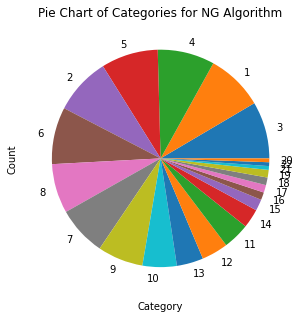

In [6]:
drawplot(df3, 'category', 'pie', 'Pie Chart of Categories for NG Algorithm', 'Category', 'Count')

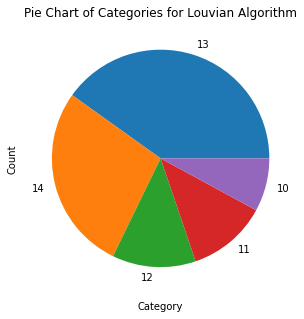

In [7]:
drawplot(df2, 'modularity_class', 'pie', 'Pie Chart of Categories for Louvian Algorithm', 'Category', 'Count')

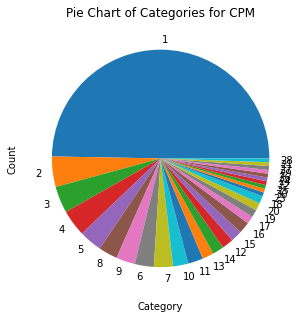

In [8]:
drawplot(df1, 'category', 'pie', 'Pie Chart of Categories for CPM', 'Category', 'Count')

### Histogram of the number of streamers in each category by CPM algorithm

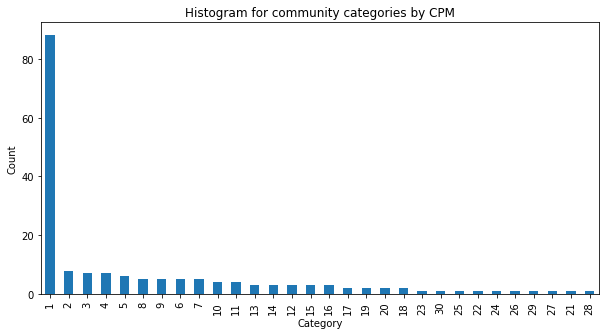

In [9]:

drawplot(df1,'category','bar', 'Histogram for community categories by CPM', 'Category', 'Count')

## Evaluate the clustering result gererated by CPM algorithm

In [10]:
TP = 0
TPFP = 0
TPFN = 0
ALLTF = 0
for i in range(1, 21):
    a5 = df[(df['category'] == i)]
    a6 = a5.groupby(['area_p'])['area_p'].count()
    print(a6)
    
    d = pd.DataFrame(a6)
    d.columns = pd.Series(['Count'])
    array = pd.to_numeric(d["Count"]).tolist()
    print(array)
    for i in array:
        if i >= 2:
            TP += i * (i-1) / 2 
    print("TP = " + str(TP))
    if sum(array) >= 2:
        TPFP += sum(array) * (sum(array) - 1) / 2
    print("TPFP = " + str(TPFP))
    # ------
    a7 = a6.sum()
    print(a7)
    a8 = a6.max()
    print(a8)
    print(a8 / a7 * 1.0)
    print('----------------------')

print("TP = " + str(TP))
print("TPFP = " + str(TPFP))

a9 = df.groupby(['area_p'])['area_p'].count()
print(a9)
d2 = pd.DataFrame(a9)
d2.columns = pd.Series(['Count'])
array2 = pd.to_numeric(d2["Count"]).tolist()
print(array2)

for i in array2:
    if i >= 2:
        TPFN += i * (i-1) / 2
print("TPFN = " + str(TPFN))

ALLTF = sum(array2) * (sum(array2) - 1) / 2
print("ALLTF = " + str(ALLTF))

print("RI = " + str((2 * TP - TPFN - TPFP + ALLTF) / ALLTF * 1.0))

FN = TPFN - TP
FP = TPFP - TP
TN = ALLTF - FN - FP - TP
print("ARI = "+ str((2 * (TP * TN - FN * FP)) / ((TP + FN) * (FN + TN) + (TP + FP) * (FP + TN)) * 1.0))
print("Precision = " + str(TP / (TP + FP) * 1.0))
print("Recall = " + str(TP / (TP + FN) * 1.0))

area_p
电台       3
虚拟主播    33
Name: area_p, dtype: int64
[3, 33]
TP = 531.0
TPFP = 630.0
36
33
0.9166666666666666
----------------------
area_p
电台       2
虚拟主播    20
Name: area_p, dtype: int64
[2, 20]
TP = 722.0
TPFP = 861.0
22
20
0.9090909090909091
----------------------
area_p
娱乐       1
虚拟主播    10
Name: area_p, dtype: int64
[1, 10]
TP = 767.0
TPFP = 916.0
11
10
0.9090909090909091
----------------------
area_p
娱乐      1
虚拟主播    8
Name: area_p, dtype: int64
[1, 8]
TP = 795.0
TPFP = 952.0
9
8
0.8888888888888888
----------------------
area_p
单机游戏    1
手游      1
电台      2
虚拟主播    3
Name: area_p, dtype: int64
[1, 1, 2, 3]
TP = 799.0
TPFP = 973.0
7
3
0.42857142857142855
----------------------
area_p
单机游戏    6
手游      1
Name: area_p, dtype: int64
[6, 1]
TP = 814.0
TPFP = 994.0
7
6
0.8571428571428571
----------------------
area_p
电台      1
虚拟主播    6
Name: area_p, dtype: int64
[1, 6]
TP = 829.0
TPFP = 1015.0
7
6
0.8571428571428571
----------------------
area_p
单机游戏    6
Name: area_p, dtype: in

### Evaluate the clustering result gererated by the Louvain methods

In [11]:
df2 = df2[['Id', 'Label', 'modularity_class']]
df2 = df2.rename(columns={'Id':'id', 'Label':'name', 'modularity_class':'category' })
df2 = df2.merge(df[['name','title','area_p','area']], on='name')

In [12]:
TP = 0
TPFP = 0
TPFN = 0
ALLTF = 0
for i in range(10, 15):
    df5 = df2[(df2['category'] == i)]
    df6 = df5.groupby(['area_p'])['area_p'].count()
    print(df6)
    
    d = pd.DataFrame(df6)
    d.columns = pd.Series(['Count'])
    array = pd.to_numeric(d["Count"]).tolist()
    print(array)
    for i in array:
        if i >= 2:
            TP += i * (i-1) / 2 
    print("TP = " + str(TP))
    if sum(array) >= 2:
        TPFP += sum(array) * (sum(array) - 1) / 2
    print("TPFP = " + str(TPFP))
    # ------
    df7 = df6.sum()
    print(df7)
    df8 = df6.max()
    print(df8)
    print(df8 / df7 * 1.0)
    print('----------------------')

print("TP = " + str(TP))
print("TPFP = " + str(TPFP))

df9 = df2.groupby(['area_p'])['area_p'].count()
print(df9)
d2 = pd.DataFrame(df9)
d2.columns = pd.Series(['Count'])
array2 = pd.to_numeric(d2["Count"]).tolist()
print(array2)

for i in array2:
    if i >= 2:
        TPFN += i * (i-1) / 2
print("TPFN = " + str(TPFN))

ALLTF = sum(array2) * (sum(array2) - 1) / 2
print("ALLTF = " + str(ALLTF))

print("RI = " + str((2 * TP - TPFN - TPFP + ALLTF) / ALLTF * 1.0))

FN = TPFN - TP
FP = TPFP - TP
TN = ALLTF - FN - FP - TP
print("ARI = "+ str((2 * (TP * TN - FN * FP)) / ((TP + FN) * (FN + TN) + (TP + FP) * (FP + TN)) * 1.0))
print("Precision = " + str(TP / (TP + FP) * 1.0))
print("Recall = " + str(TP / (TP + FN) * 1.0))

area_p
单机游戏    5
娱乐      1
手游      1
网游      1
虚拟主播    6
Name: area_p, dtype: int64
[5, 1, 1, 1, 6]
TP = 25.0
TPFP = 91.0
14
6
0.42857142857142855
----------------------
area_p
娱乐       1
手游       1
网游       2
虚拟主播    13
Name: area_p, dtype: int64
[1, 1, 2, 13]
TP = 104.0
TPFP = 227.0
17
13
0.7647058823529411
----------------------
area_p
电台       2
虚拟主播    17
Name: area_p, dtype: int64
[2, 17]
TP = 241.0
TPFP = 398.0
19
17
0.8947368421052632
----------------------
area_p
单机游戏    17
娱乐       4
手游      18
电台       2
网游      22
虚拟主播     3
Name: area_p, dtype: int64
[17, 4, 18, 2, 22, 3]
TP = 771.0
TPFP = 2543.0
66
22
0.3333333333333333
----------------------
area_p
娱乐       2
电台       4
虚拟主播    38
Name: area_p, dtype: int64
[2, 4, 38]
TP = 1481.0
TPFP = 3489.0
44
38
0.8636363636363636
----------------------
TP = 1481.0
TPFP = 3489.0
area_p
单机游戏    22
娱乐       8
手游      20
电台       8
网游      25
虚拟主播    77
Name: area_p, dtype: int64
[22, 8, 20, 8, 25, 77]
TPFN = 3703.0
ALLTF = 12720.0
RI =